# Project 2 Bike Sharing Dataset

In this project we aim to predict the Number of bike rented based on the give data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [3]:
data=pd.read_csv('hour.csv')

In [3]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Detailed Information of the features in dataset
 instant: record index

 dteday : date

 season : season (1:winter, 2:spring, 3:summer, 4:fall)

 yr : year (0: 2011, 1:2012)

 mnth : month ( 1 to 12)

 hr : hour (0 to 23)

 holiday : weather day is holiday or not

 weekday : day of the week
 
 workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
 
 weathersit :
 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 
 temp : Normalized temperature in Celsius.
 
 atemp: Normalized feeling temperature in Celsius. 
 
 hum: Normalized humidity. The values are divided to 100 (max)
 
 windspeed: Normalized wind speed. The values are divided to 67 (max)
 
 casual: count of casual users
 
 registered: count of registered users
 
 cnt: count of total rental bikes including both casual and registered

In [4]:
data.shape

(17379, 17)

In [5]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
#From the above information found that the instant and dteday are not required as we are calclating base on hour, so lets drop those features
data.drop(['instant'],axis=1,inplace=True)
data.drop(['dteday'],axis=1,inplace=True)


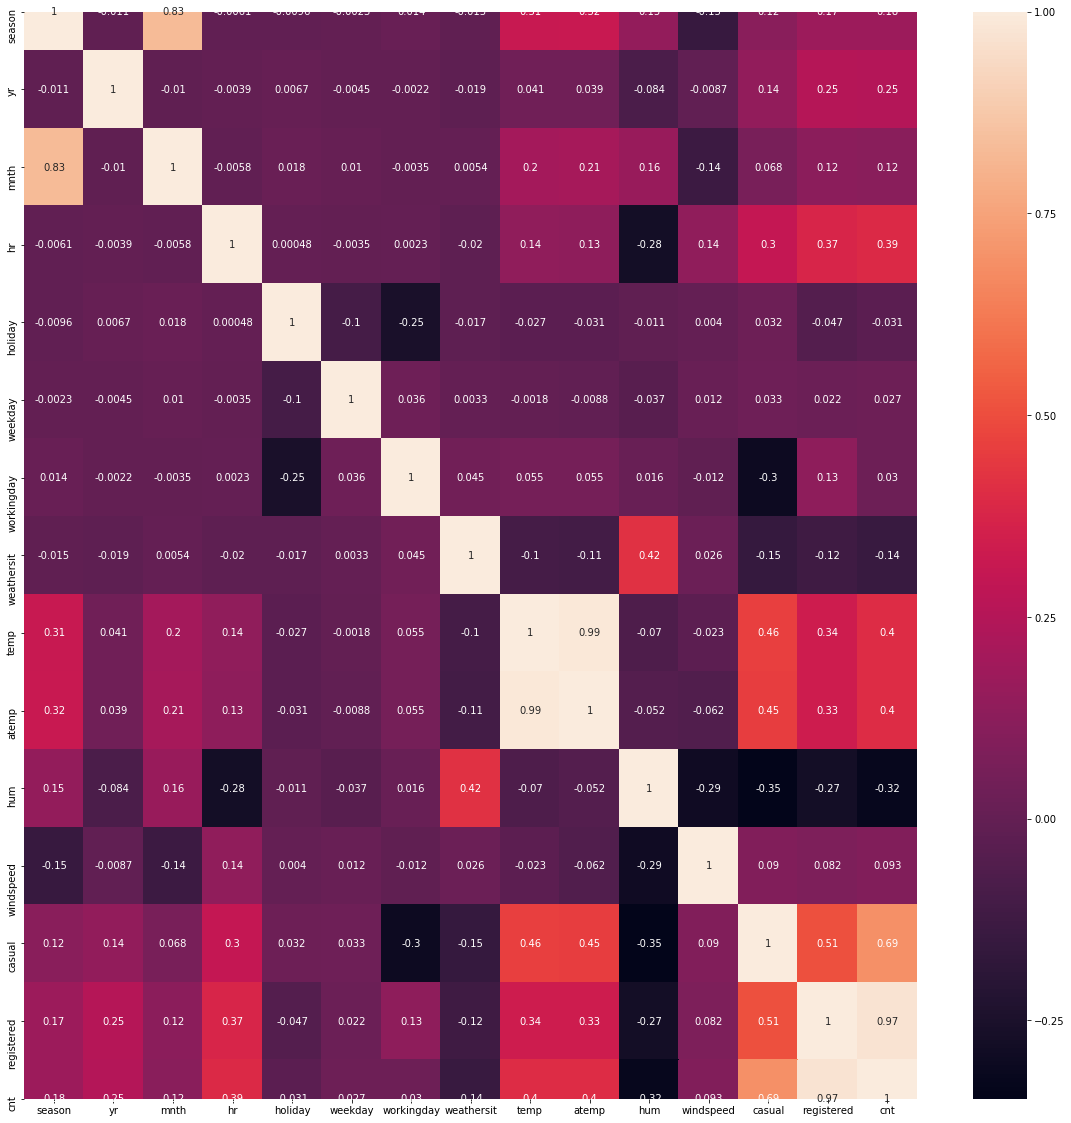

In [8]:
#Checking the correlation
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

From the above we can see that temp and atemp, registered and count is highly correlated 

## Statistical Summary

In [9]:
data.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
#Lets Check the skewness of the data
data.skew()

season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
holiday       5.638538
weekday      -0.002998
workingday   -0.785258
weathersit    1.228047
temp         -0.006021
atemp        -0.090429
hum          -0.111287
windspeed     0.574905
casual        2.499237
registered    1.557904
cnt           1.277412
dtype: float64

In [11]:
#Lets treat above skewness
#for index in data.skew().index:
#    if data.skew().loc[index]>0.5:
 #       data[index]=np.cbrt(data[index])
  #  if data.skew().loc[index]<-0.5:
   #     data[index]=np.cbrt(data[index])

## Lets do EDA
    

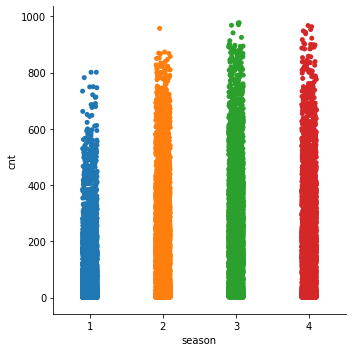

In [13]:
sns.catplot(x='season',y='cnt',data=data)

From the above Graph we can see that as the season increases number of bikes rented also increases

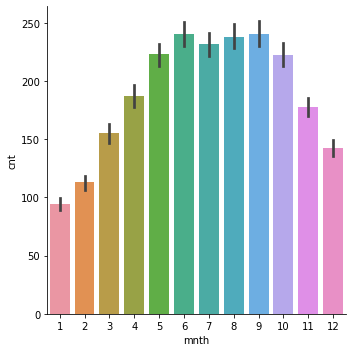

In [14]:
sns.catplot(x='mnth',y='cnt',data=data,kind='bar')

From the above Graph we can see that on the summer and rainy season the number of bikes rented increases

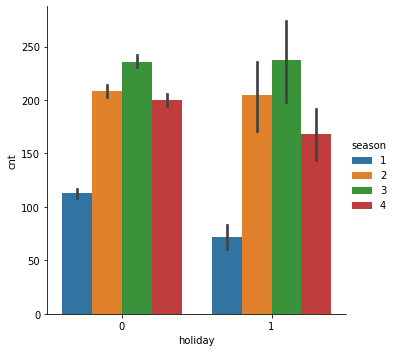

In [15]:
sns.catplot(x='holiday',y='cnt',hue='season',data=data,kind='bar')

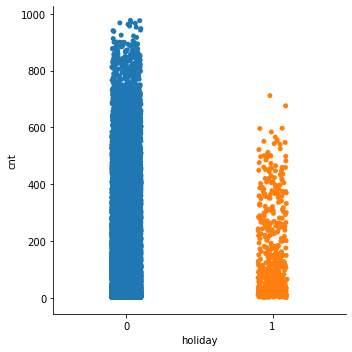

In [16]:
sns.catplot(x='holiday',y='cnt',data=data)

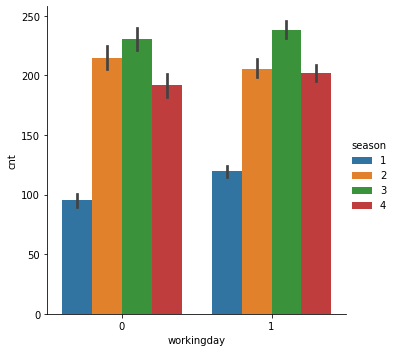

In [17]:
sns.catplot(x='workingday',y='cnt',hue='season',data=data,kind='bar')

In [ ]:
sns.pairplot(data,hue='cnt')

In [20]:
#Lets Remove Outliers
from scipy import stats
data=data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

In [21]:
x=data.iloc[:,:-1]
x.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1


In [22]:
y=data['cnt']
y.head()

0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64

In [23]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [40]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=50)

In [41]:
x_train.shape,y_train.shape

((12747, 14), (12747,))

In [42]:
x_test.shape,y_test.shape

((3187, 14), (3187,))

In [43]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [44]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
DTR=DecisionTreeRegressor(random_state=23)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=23)
RFR=RandomForestRegressor(random_state=23)
GBR=GradientBoostingRegressor(random_state=23)

In [45]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

In [46]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [57]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
RMSE=[]
for name,model in models:
    print('/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\ ',name,'/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\ ')
    print('\n')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pr=model.predict(x_test)
    r2=r2_score(y_test,pr)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pr)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,2))
    mae=mean_absolute_error(y_test,pr)
    print("Mean_Absolute_Error =",mae)
    MAE.append(round(mae,2))
    rmse=np.sqrt(mse)
    print("Mean_Squared_Error =",rmse)
    RMSE.append(round(rmse,2))
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\  LinearRegression /*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\ 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  1.0
Mean_Squared_Error = 1.7937288074693642e-26
Mean_Absolute_Error = 1.0436305447420863e-13
Mean_Squared_Error = 1.3393016118370665e-13
Cross_Val_Score =  1.0


/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\  Lasso /*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\ 


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.9999407647164714
Mean_Squared_Error = 1.298795448893529
Mean_Absolute_Error = 0.9223318566580226
Mean_Squared_Error = 1.1396470720769343
Cross_Val_Score =  0.99991984478321


/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\  Ridge /*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\*/*\ 


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, ran

In [49]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error' :MAE,'Root_Mean_Squared_Error' :RMSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Root_Mean_Squared_Error,Cross_val_score
0,LinearRegression,1.000000,0.00,0.00,0.00,1.000000
1,Lasso,0.999941,1.30,0.92,1.14,0.999920
2,Ridge,1.000000,0.00,0.01,0.01,1.000000
3,ElasticNet,0.922625,1696.53,31.03,41.19,0.900533
4,DecisionTreeRegressor,0.999376,13.68,1.87,3.70,0.999289
5,KNeighborsRegressor,0.957352,935.11,22.67,30.58,0.922442
6,AdaBoostRegressor,0.985121,326.24,14.63,18.06,0.973401
7,RandomForestRegressor,0.999753,5.41,1.07,2.33,0.999750
8,GradientBoostingRegressor,0.999449,12.08,2.35,3.48,0.999329


 From the above comparission we can see that both Linear Regression and Regularization technique(Ridge and Lasso) are working     best, but i choose Linear Regression as Mean Absolute Error and Root Mean Squared Error is less compare to Ridge and Lasso

In [50]:
from sklearn.externals import joblib

F:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [54]:
joblib.dump(LR,'model_BikeRented.csv')

['model_BikeRented.csv']

In [55]:
model=joblib.load('model_BikeRented.csv')

In [56]:
model.predict(x_test)

array([ 10., 572., 108., ..., 119., 172., 253.])